## This file will get dataset from AzureML and using H2O to create k-mean clustering model

## Required Lib:
* pip install azureml.core
* pip install azureml-dataprep
* pip install ruamel.yaml

In [30]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
#import azureml
from azureml.core import Workspace, Dataset

subscription_id = '4914f262-bda8-46cc-a9db-c9cbd694b117'
resource_group = 'databrick'
workspace_name = 'foredeploymodel'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='churnPrediction')
dataset.to_pandas_dataframe() 

C:\Users\wipadac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\azureml\dataprep\api\_dataframereader.py:171: UserWarning: Please install pyarrow>=0.16.0 for improved performance of to_pandas_dataframe. You can ensure the correct version is installed by running: pip install pyarrow>=0.16.0 --upgrade
  warnings.warn('Please install pyarrow>=0.16.0 for improved performance of to_pandas_dataframe. '


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
df= dataset.to_pandas_dataframe()


C:\Users\wipadac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\azureml\dataprep\api\_dataframereader.py:171: UserWarning: Please install pyarrow>=0.16.0 for improved performance of to_pandas_dataframe. You can ensure the correct version is installed by running: pip install pyarrow>=0.16.0 --upgrade
  warnings.warn('Please install pyarrow>=0.16.0 for improved performance of to_pandas_dataframe. '


In [6]:
# import time to measure elapsed time
from timeit import default_timer as timer
from datetime import timedelta
import time

start = timer()
end = timer()
print("Time:", timedelta(seconds=end-start))

Time: 0:00:00.000016


## Running H2O Locally

In [11]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
Using legacy 'setup.py install' for h2o, since package 'wheel' is not installed.
Using legacy 'setup.py install' for future, since package 'wheel' is not installed.
    Running setup.py install for future: startedNote: you may need to restart the kernel to use updated packages.
    Running setup.py install for future: finished with status 'done'
    Running setup.py install for h2o: started
    Running setup.py install for h2o: finished with status 'done'

You should consider upgrading via the 'C:\Users\wipadac\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.291-b10, mixed mode)
  Starting server from C:\Users\wipadac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\wipadac\AppData\Local\Temp\tmpxern4e3o
  JVM stdout: C:\Users\wipadac\AppData\Local\Temp\tmpxern4e3o\h2o_wipadac_started_from_python.out
  JVM stderr: C:\Users\wipadac\AppData\Local\Temp\tmpxern4e3o\h2o_wipadac_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,22 hours and 45 minutes
H2O_cluster_name:,H2O_from_python_wipadac_kgddav
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.495 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [8]:
#import h2o
from h2o.estimators import H2OKMeansEstimator
# load data to h2o
data_h2o = h2o.H2OFrame(df)
col_list = ['CustomerId','Surname','Geography','Gender','Age','Exited']
# set the predictor names
predictors = ['CreditScore','Tenure','Balance','NumOfProducts', 'HasCrCard','IsActiveMember','EstimatedSalary']



# run h2o Kmeans to estimate good number of K where maximum is at 10 
h2o_km = H2OKMeansEstimator(k = 10, estimate_k = True, init="furthest", standardize=True, ignored_columns = col_list,seed = 1234)

start = timer()
h2o_km.train(training_frame=data_h2o)
end = timer()

user_points = h2o.H2OFrame(h2o_km.centers())

# show details
h2o_km.show()
print("Time:", timedelta(seconds=end-start))

Parse progress: |█████████████████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1619773255297_1


Model Summary: 


,,number_of_rows,number_of_clusters,number_of_categorical_columns,number_of_iterations,within_cluster_sum_of_squares,total_sum_of_squares,between_cluster_sum_of_squares
0,,10000.0,3.0,0.0,22.0,55672.82435,69993.0,14320.17565




ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 55654.86958231543
Total Sum of Square Error to Grand Mean: 69992.9993648716
Between Cluster Sum of Square Error: 14338.129782556178

Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,3318.0,17825.699403
1,,2.0,3391.0,18997.961352
2,,3.0,3291.0,18831.208827



Scoring History: 


,,timestamp,duration,iterations,number_of_clusters,number_of_reassigned_observations,within_cluster_sum_of_squares
0,,2021-04-30 16:02:44,0.085 sec,0.0,0.0,NaN,NaN
1,,2021-04-30 16:02:45,0.167 sec,1.0,1.0,10000.0,121516.355830
2,,2021-04-30 16:02:45,0.181 sec,2.0,1.0,0.0,69993.000000
3,,2021-04-30 16:02:45,0.205 sec,3.0,2.0,112.0,63405.689502
4,,2021-04-30 16:02:45,0.214 sec,4.0,2.0,102.0,63393.262163
5,,2021-04-30 16:02:45,0.222 sec,5.0,2.0,101.0,63381.788757
6,,2021-04-30 16:02:45,0.230 sec,6.0,2.0,94.0,63370.925762
7,,2021-04-30 16:02:45,0.240 sec,7.0,2.0,78.0,63361.249286
8,,2021-04-30 16:02:45,0.248 sec,8.0,2.0,78.0,63353.175854
9,,2021-04-30 16:02:45,0.258 sec,9.0,2.0,62.0,63346.859799



See the whole table with table.as_data_frame()
Time: 0:00:00.762620


In [9]:
h2o_km.centers()

[[579.2528974739971,
  5.371173848439821,
  102708.62839227341,
  1.2136701337295706,
  0.7777117384843986,
  0.33194650817236265,
  98532.96591976225],
 [721.3110047846891,
  4.470992822966507,
  110528.84029306218,
  1.2912679425837335,
  0.6226076555023923,
  0.6892942583732056,
  102564.71981758373],
 [651.4852628380431,
  5.196900638103919,
  15082.320388939246,
  2.0966271649954447,
  0.7158918261926467,
  0.5253722272865391,
  99168.19976298997]]

In [10]:
# Save Model
path = 'H2o'
model_path = h2o.save_model(model=h2o_km, path=path, force=True)
print(model_path)


C:\MyFolder\Demo\H2OSegment_DeployPBI\H2o\KMeans_model_python_1619773255297_1


In [11]:
#Save Mojo
path = 'H2o'
h2o_km.save_mojo(path)

'C:\\MyFolder\\Demo\\H2OSegment_DeployPBI\\H2o\\KMeans_model_python_1619773255297_1.zip'

In [13]:
clusterid = h2o_km.predict(data_h2o)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [14]:
result = clusterid.concat(data_h2o)

In [15]:
h2o.export_file(result,'segment_result.csv', force = True)

Export File progress: |███████████████████████████████████████████████████| 100%


In [16]:
df['km_pred'] = h2o_km.predict(data_h2o).as_data_frame()['predict'].astype("category")

groups = df.groupby('km_pred')





kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [17]:
groups.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,km_pred
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,2
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,2
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1


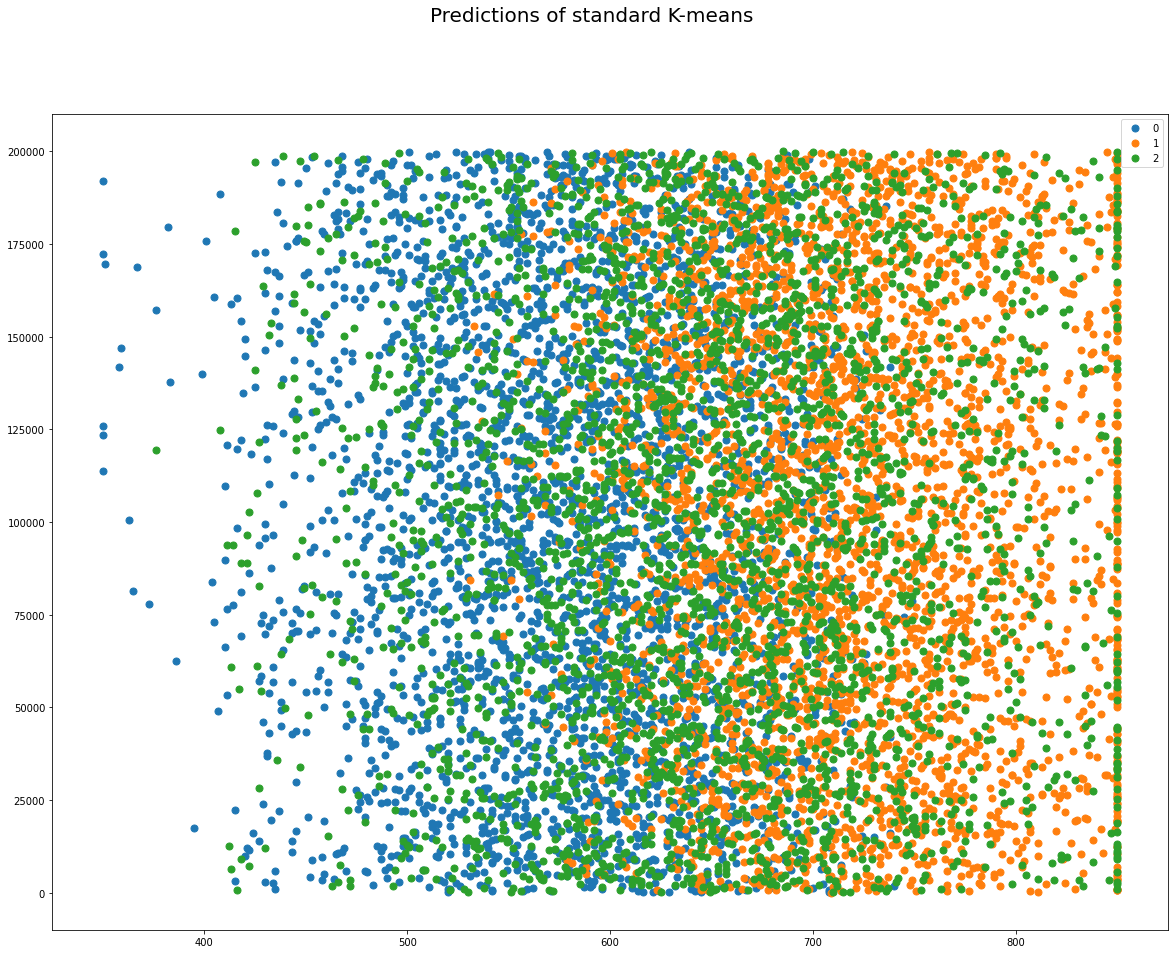

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(20,15))
for name, group in groups:
    ax.plot(group.CreditScore, group.EstimatedSalary, marker='o', linestyle='', ms=7, label=name)

fig.suptitle("Predictions of standard K-means", fontsize=20)  
ax.legend(numpoints=1)

In [22]:
h2o.shutdown()

<ipython-input-22-1edf85295eae>:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
H2O session _sid_a990 closed.


In [23]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [24]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.291-b10, mixed mode)
  Starting server from C:\Users\wipadac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\wipadac\AppData\Local\Temp\tmpx6lzdl0y
  JVM stdout: C:\Users\wipadac\AppData\Local\Temp\tmpx6lzdl0y\h2o_wipadac_started_from_python.out
  JVM stderr: C:\Users\wipadac\AppData\Local\Temp\tmpx6lzdl0y\h2o_wipadac_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,22 hours and 55 minutes
H2O_cluster_name:,H2O_from_python_wipadac_f4l7ss
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.495 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [25]:
model =  h2o.load_model('H2o/KMeans_model_python_1619773255297_1')

In [26]:
data_h2o = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [27]:
result = model.predict(data_h2o).as_data_frame()['predict']

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [28]:
type(result)

pandas.core.series.Series